In [1]:
import numpy as np
import pandas as pd

In [56]:
def get_hat_matrix(X):
    # Calculate the matrix product X'X
    XtX = X.T @X
    # Calculate the inverse of (X'X)
    XtX_inv = np.linalg.pinv(XtX)
    
    # Calculate the Hat matrix
    H= X@(XtX_inv@X.T)
    
    return H

In [2]:
data = pd.read_excel('DA1_hat_data.xlsx')
data

,Color,Quality,Price
0,7,5,65
1,3,7,38
2,5,8,51
3,8,1,38
4,9,3,55
5,5,4,43
6,4,0,25
7,2,6,33
8,8,7,71
9,6,4,51


In [14]:

# Extract the target variable and regressors
target_variable = data['Price']  # the target variable
regressors = data[['Color', 'Quality']]  # regressors

# Add a column of ones at the beginning of the regressors DataFrame
regressors = pd.DataFrame(np.c_[np.ones(len(regressors)), regressors], columns=['ones'] + list(regressors.columns))

# Convert the regressors DataFrame to a NumPy matrix
X = regressors.values

print("Target Variable:")
print(target_variable)
print("\nDesign Matrix (X):")
print(X.shape,'\n', X)

Target Variable:
0     65
1     38
2     51
3     38
4     55
5     43
6     25
7     33
8     71
9     51
10    49
Name: Price, dtype: int64

Design Matrix (X):
(11, 3) 
 [[1. 7. 5.]
 [1. 3. 7.]
 [1. 5. 8.]
 [1. 8. 1.]
 [1. 9. 3.]
 [1. 5. 4.]
 [1. 4. 0.]
 [1. 2. 6.]
 [1. 8. 7.]
 [1. 6. 4.]
 [1. 9. 2.]]


In [57]:

# Add a column of ones for the intercept term
X = np.column_stack((np.ones(len(X)), X))

# Calculate the Hat matrix
H = get_hat_matrix(X)
#print(H)  # Output: (100, 100)
H

array([[ 0.1277394 ,  0.06869518,  0.134182  ,  0.07956221,  0.13927915,
         0.06225258, -0.03342907,  0.02696059,  0.18745634,  0.08600481,
         0.1212968 ],
       [ 0.06869518,  0.29053792,  0.23379648, -0.08158038, -0.06931615,
         0.12543662,  0.05899247,  0.30536366,  0.0809594 ,  0.08352092,
        -0.09640612],
       [ 0.134182  ,  0.23379648,  0.29509172, -0.08515097,  0.02882351,
         0.07288675, -0.15219022,  0.17537323,  0.24815649,  0.07575875,
        -0.02672773],
       [ 0.07956221, -0.08158038, -0.08515097,  0.26709617,  0.20220446,
         0.08313281,  0.23216642, -0.05875961,  0.0146705 ,  0.10238299,
         0.2442754 ],
       [ 0.13927915, -0.06931615,  0.02882351,  0.20220446,  0.2466558 ,
         0.04113949,  0.00284613, -0.11684649,  0.1837305 ,  0.09174882,
         0.24973479],
       [ 0.06225258,  0.12543662,  0.07288675,  0.08313281,  0.04113949,
         0.11480245,  0.17775363,  0.15695102,  0.02025926,  0.09376698,
         0.051

In [7]:
Fitted_values= H@target_variable 
Fitted_values

array([54.81049962, 42.74617713, 56.29516934, 44.67212606, 57.08424539,
       41.26150741, 21.33255712, 34.09247329, 67.22261896, 46.15679578,
       53.32582991])

In [8]:
import matplotlib.pyplot as plt

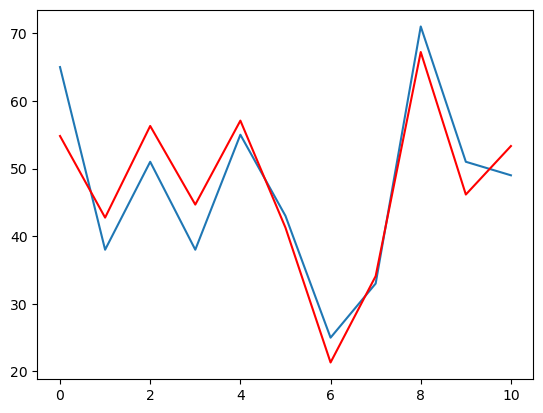

In [9]:
plt.plot(target_variable)
plt.plot(Fitted_values, color='red')

In [11]:
Residual = target_variable - Fitted_values
Residual

0     10.189500
1     -4.746177
2     -5.295169
3     -6.672126
4     -2.084245
5      1.738493
6      3.667443
7     -1.092473
8      3.777381
9      4.843204
10    -4.325830
Name: Price, dtype: float64